In [1]:
# Reber Grammar Implementation using Keras 

In [2]:
# Reber Grammar String Generator Class

In [3]:
import random as rnd

class ReberGrammarLexicon(object):

    lexicon = set() #contain Reber words
    graph = [ [(1,'T'), (2,'P')], \
            [(1, 'S'), (3, 'X')], \
            [(2,'T') ,(4, 'V')],  \
            [(2, 'X'), (5,'S')],           \
            [(3, 'P'),(5, 'V')],  \
            [(6,'E')] ]  #store the graph

    def __init__(self, num, maxSize = 1000): #fill Lexicon with num words

        self.maxSize = maxSize

        if maxSize < 5:
            raise NameError('maxSize too small, require maxSize > 4') 

        while len(self.lexicon) < num:

            word = self.generateWord()
            if word != None:
                self.lexicon.add(word)

    def generateWord(self): #generate one word

        c = 2
        currentEdge = 0
        word = 'B'

        while c <= self.maxSize:

            inc = rnd.randint(0,len(self.graph[currentEdge])-1)
            nextEdge = self.graph[currentEdge][inc][0]
            word += self.graph[currentEdge][inc][1]
            currentEdge = nextEdge
            if currentEdge == 6 :
                break
            c+=1

        if c > self.maxSize :
            return None

        return word

In [4]:
import numpy as np

In [5]:
maxsize = 20
inputdim = 7
outputdim = 7
hiddendim = 3

In [6]:
chars='BEPSTVX'

In [7]:
# One-hot encoding generated reber strings 

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
data = ['B', 'E', 'P', 'S', 'T', 'V', 'X']
values = np.array(data)

# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit(integer_encoded)

In [10]:
def func(word,start=0):
    word = np.array(list(word[start:]))
    encoded = label_encoder.transform(word)
    return onehot_encoded.transform(encoded.reshape(-1,1))    

In [11]:
# Padding each one-hot encoded input string to the maximum length

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/gokul/opt/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [13]:
def pad(z):
    z = np.expand_dims(z,axis =0)
    padded = pad_sequences(z,maxlen=20,padding='post',value=[0.,0.,0.,0.,0.,0.,0.])
    return padded[0]    

In [14]:
def preprocessing(dictionary,start=0):
    length = len(dictionary)
    result = []
    
    for word in dictionary:
        result.extend(pad(func(word,start)))
        
    return np.array(result).reshape(length,maxsize,7)       

In [15]:
generator = ReberGrammarLexicon(2400,maxSize=20)

In [16]:
generator.lexicon

{'BTXXTTVPXTVVE',
 'BTSXXTTTTTTTTTTTVVE',
 'BTXXTTTTTVPXTVVE',
 'BTSSXXTTVPXTVPXTVVE',
 'BTSXXVPXVPXVPXTVPSE',
 'BTXXTTTVPXTTTTTVVE',
 'BTSSSSSXXTVPXVVE',
 'BTSXXTTVPXTTTTTTTVVE',
 'BPVPXTTVPXVPXTTTVPSE',
 'BTXXTTTTTTTVPXTVVE',
 'BTSXXTTTVPXTVPXTVVE',
 'BPTTVPXTTVPXTTTTVVE',
 'BPTTTTVPXVPXTTTTVPSE',
 'BPTTTTTTTVPXVVE',
 'BTXXVPXTTTTTVPXTVPSE',
 'BPTVPXVPXTTTVPXVVE',
 'BPTVPXTTVPXTVPSE',
 'BTSXXTVPXTVPXTTTVPSE',
 'BPVPXTTTTVPXVPXVVE',
 'BTSSSSSXXVPXTTTTTVVE',
 'BPTVPXVPXVPXTTTTVPSE',
 'BPVPXTTVPXTTVPXTTVVE',
 'BTSXXTTTVPXTTVPXVPSE',
 'BPTTVPXTVPXTTTVPXVVE',
 'BTXXTTTVPXTTTTTTVPSE',
 'BPVPXTVPXTTVPXTVVE',
 'BPTTVPXTTTTTTVPXTVVE',
 'BPVPXVPXVPSE',
 'BTXXTTTTTTTTTTVVE',
 'BPVPXVPXTTTTTVPSE',
 'BPVPXVPXTTTVPXVPSE',
 'BPTTTTTTTTTVPXTTVPSE',
 'BTXXTTTTTVVE',
 'BTSXXTTVPXVPXTVPXVVE',
 'BTSSSXXTTVPXTTVVE',
 'BPTVPXTTVPXVPXTVPSE',
 'BPVPXVPXVPXTVPXTVPSE',
 'BPTTTTTTTTTTVPXTVVE',
 'BPTTVPXTVPXVPSE',
 'BTSSXXTTTTTTVPXTVPSE',
 'BPTVPXTVPXTVPXTTVPSE',
 'BTSSSSSXXTTTTTTTVVE',
 'BTSSSSSXXVPXVVE',
 'BT

In [17]:
# Train-Test Split

In [18]:
X_train = preprocessing(list(generator.lexicon)[:2000])

In [19]:
y_train = preprocessing(list(generator.lexicon)[:2000],1)

In [20]:
X_test = preprocessing(list(generator.lexicon)[2000:])

In [21]:
y_test = preprocessing(list(generator.lexicon)[2000:],1)

In [23]:
#X_validation = preprocessing(list(generator.lexicon)[2000:])

In [24]:
#y_validation = preprocessing(list(generator.lexicon)[2000:],1)

In [25]:
# Model Creation

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,TimeDistributed,Dropout

In [23]:
model = Sequential()

In [24]:
model.add(SimpleRNN(hiddendim,activation='relu',return_sequences=True,input_shape=X_train.shape[1:]))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
model.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [26]:
model.add(TimeDistributed(Dense(outputdim,activation='softmax')))

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=5,verbose=1)

In [29]:
import tensorflow.keras.backend as K 
from tensorflow.keras.metrics import top_k_categorical_accuracy
def my_top_k(true, pred, num=2):
    true = K.reshape(true, (-1, outputdim))   
    pred = K.reshape(pred, (-1, outputdim))
    return top_k_categorical_accuracy(true, pred, k=num)

In [30]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=[my_top_k])

In [31]:
model.fit(x=X_train,y=y_train,batch_size=1,epochs=50,callbacks=[early_stop],validation_split=0.2)

Train on 1600 samples, validate on 400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2914 - my_top_k: 0.6005 - val_loss: 0.2379 - val_my_top_k: 0.7535
Epoch 2/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2452 - my_top_k: 0.6957 - val_loss: 0.2101 - val_my_top_k: 0.7664
Epoch 3/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2343 - my_top_k: 0.7119 - val_loss: 0.2014 - val_my_top_k: 0.7860
Epoch 4/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2305 - my_top_k: 0.7205 - val_loss: 0.1963 - val_my_top_k: 0.8066
Epoch 5/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2279 - my_top_k: 0.7285 - val_loss: 0.1935 - val_my_top_k: 0.8066
Epoch 6/50
1600/1600 [==============================] - 5s 3ms/sample - loss: 0.2221 - my_top_k: 0.7357 - val_loss: 0.1862 - val_my_top_k: 0.8136
Epoch 7/50
1600/1600 [=======

In [32]:
import pandas as pd

In [33]:
losses = pd.DataFrame(model.history.history)

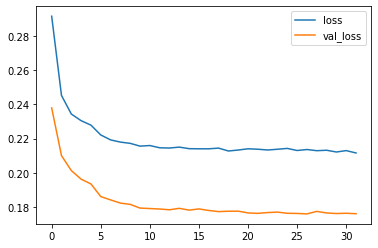

In [34]:
losses[['loss','val_loss']].plot()

In [35]:
score = model.evaluate(X_test, y_test, batch_size=1, verbose=1)

400/400 [==============================] - 0s 1ms/sample - loss: 0.1763 - my_top_k: 0.8324


In [36]:
z = model.predict(X_test)

In [ ]:
# Analysis of a string

In [37]:
print(list(chars))
print((z.round(decimals=2)[0]))

['B', 'E', 'P', 'S', 'T', 'V', 'X']
[[0.   0.04 0.25 0.08 0.33 0.23 0.06]
 [0.   0.07 0.   0.38 0.03 0.01 0.51]
 [0.   0.11 0.   0.47 0.   0.   0.43]
 [0.   0.05 0.   0.48 0.   0.   0.47]
 [0.   0.03 0.   0.38 0.   0.   0.59]
 [0.   0.03 0.04 0.   0.63 0.3  0.  ]
 [0.   0.01 0.   0.   0.65 0.34 0.  ]
 [0.   0.   0.   0.   0.64 0.36 0.  ]
 [0.   0.   0.   0.   0.63 0.37 0.  ]
 [0.   0.   0.   0.   0.62 0.37 0.  ]
 [0.   0.   0.   0.   0.62 0.38 0.  ]
 [0.   0.   0.   0.   0.62 0.38 0.  ]
 [0.   0.07 0.65 0.   0.04 0.24 0.  ]
 [0.   0.   0.   0.24 0.   0.   0.76]
 [0.   0.   0.   0.   0.61 0.39 0.  ]
 [0.   0.07 0.53 0.   0.06 0.34 0.  ]
 [0.   0.88 0.02 0.04 0.01 0.04 0.  ]
 [0.   0.07 0.16 0.14 0.31 0.22 0.1 ]
 [0.   0.06 0.19 0.12 0.32 0.23 0.08]
 [0.   0.07 0.16 0.14 0.31 0.22 0.1 ]]


In [44]:
temp(X_test[0])

['BTSSXXTTTTTTVPXVVE']

In [45]:
y_test[0]

array([[0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [46]:
def top_2_accuracy(y_test,y_pred):
    i = 0
    k = y_test.shape[0]*y_test.shape[1]
    correct = 0
    test = np.reshape(y_test,(y_test.shape[0]*y_test.shape[1],y_test.shape[2]))
    pred = np.reshape(y_pred,(y_pred.shape[0]*y_pred.shape[1],y_pred.shape[2]))
    while(i<len(test)):
        
        if (test[i] == np.array((0, 1, 0, 0, 0, 0, 0))).all(): 
            if (test[i].argmax() == pred[i].argsort()[-1]) | (test[i].argmax() == pred[i].argsort()[-2]):
                correct += 1
            k -= (20%i)
            i = i + (20%i)
            continue
        
        if (test[i].argmax() == pred[i].argsort()[-1]) | (test[i].argmax() == pred[i].argsort()[-2]):
            correct += 1
        i += 1
    print(correct)
    print(k)
    print(correct/k)        

In [47]:
top_2_accuracy(y_test,z)

2597
2656
0.9777861445783133


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
# Loss function graph over epochs
# Binary Cross-Entropy Loss

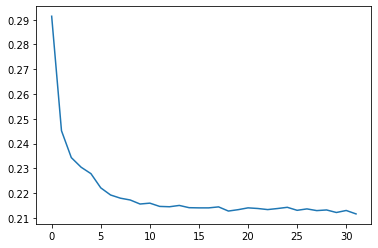

In [72]:
plt.plot(list(range(32)),model.history.history['loss'])

In [ ]:
# Retrieving back the hidden unit activation paterns

In [48]:
import tensorflow.keras.backend as K

In [49]:
lstm = model.layers[0]

# Get output from intermediate layer to visualize activations
attn_func = K.function(inputs = [model.get_input_at(0), K.learning_phase()],
           outputs = [lstm.output])

In [50]:
attn_func.outputs[0]

<tf.Tensor 'simple_rnn/transpose_1:0' shape=(?, 20, 3) dtype=float32>

In [51]:
h = attn_func(X_test)[0]

In [52]:
len(h)

400

In [53]:
points = (h.round(decimals=2))

In [54]:
points.shape

(400, 20, 3)

In [ ]:
# Hierarchical Clustering using Scipy

In [55]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [56]:
# Dendrogram

In [57]:
temp(X_test[0])

['BTSSXXTTTTTTVPXVVE']

In [78]:
points[0]

array([[0.44, 0.  , 0.  ],
       [0.  , 0.  , 0.34],
       [0.41, 0.  , 0.65],
       [0.51, 0.  , 1.4 ],
       [0.  , 0.  , 0.95],
       [0.  , 0.31, 0.03],
       [0.  , 0.79, 0.  ],
       [0.  , 1.11, 0.  ],
       [0.  , 1.34, 0.  ],
       [0.  , 1.5 , 0.  ],
       [0.  , 1.61, 0.  ],
       [0.  , 1.68, 0.  ],
       [2.7 , 0.07, 0.  ],
       [0.  , 0.  , 3.78],
       [0.  , 1.82, 0.  ],
       [2.66, 0.17, 0.  ],
       [3.1 , 0.  , 0.36],
       [0.5 , 0.  , 0.06],
       [0.51, 0.  , 0.04],
       [0.51, 0.  , 0.06]], dtype=float32)

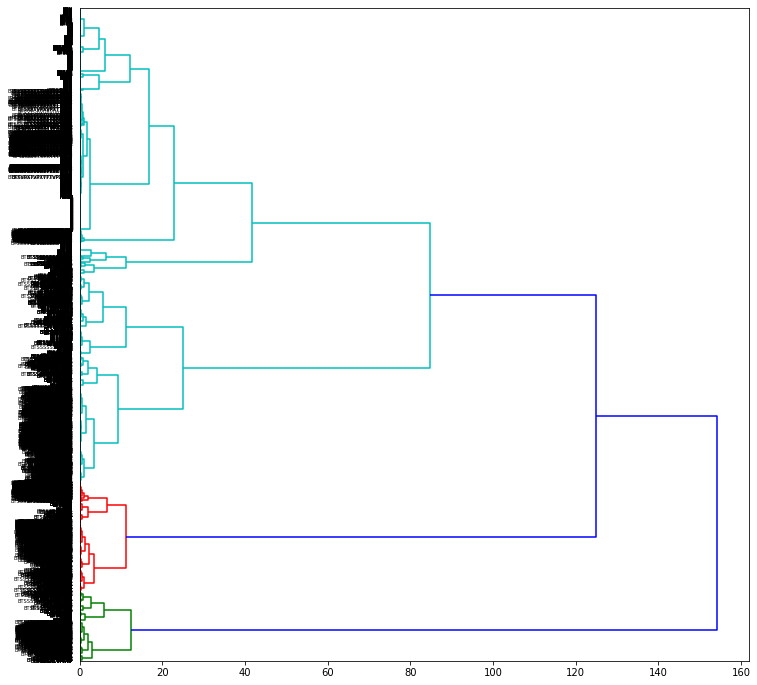

In [85]:
plt.figure(figsize=(12,12))
dendrogram = sch.dendrogram(sch.linkage(points_temp,method='ward'),orientation='right',labels=labels)

In [74]:
points[0]

array([[0.  , 0.  , 0.27],
       [0.  , 0.58, 0.  ],
       [0.  , 0.13, 0.  ],
       [0.  , 1.64, 0.  ],
       [0.26, 1.17, 1.17],
       [0.5 , 0.24, 2.39],
       [0.32, 0.55, 2.13],
       [3.61, 0.  , 0.11],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.49],
       [0.5 , 0.28, 2.62],
       [0.47, 0.54, 2.34],
       [3.61, 0.  , 0.33],
       [0.  , 1.88, 0.  ],
       [0.43, 1.09, 1.5 ],
       [0.5 , 0.28, 2.62],
       [3.55, 0.  , 0.18],
       [0.  , 1.88, 0.  ],
       [0.  , 0.  , 0.  ],
       [0.05, 0.02, 0.  ]], dtype=float32)

In [ ]:
labels[40:60]

In [ ]:
temp(X_test[2])

In [ ]:
points[2]

In [ ]:
# Saving Model

In [ ]:
from tensorflow.keras.models import save_model,load_model

In [ ]:
model.save("reber.h5")

In [ ]:
model = load_model("reber.h5")

In [ ]:
a = model.predict(X_test)

In [ ]:
(a.round(decimals=3)[3] )

In [ ]:
print(chars)
print(y_test[0])

In [ ]:
points

In [ ]:
a.shape

In [39]:
def seq2char(sequence):
    
    if sequence.any():
        return chars[sequence.argmax()]
    else:
        return ''    

In [40]:
def word(X):
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [41]:
def temp(X):
    X = np.expand_dims(X,axis=0)
    l = X.shape[0]
    result = []
    
    for i in range(l):
        temp = ''
        for sequence in X[i]:
            temp = temp + seq2char(sequence)
        result.append(temp)
        
    return result

In [65]:
word_list = word(X_test)

In [59]:
def func(word):
    label_list = []
    k=0

    for i in range(1,21):
        if i <= len(word):
            label_list.append(word[:i])
        else:
            label_list.append('NULL')
        
        k = k + 1
        
    return label_list

In [84]:
points_temp = points.reshape(points.shape[0]*points.shape[1],points.shape[2])

In [63]:
X_test_temp = X_test.reshape(X_test.shape[0]*X_test.shape[1],X_test.shape[2])

In [58]:
def label(X):
    result = []
    
    for i in range(0,len(X),maxsize):
        word_no = i // maxsize
        
        result.extend(func(word_list[word_no]))
        
    return result  

In [66]:
labels = label(X_test_temp)

In [67]:
len(labels)

8000

In [68]:
func(word_list[0])

['B',
 'BT',
 'BTS',
 'BTSS',
 'BTSSX',
 'BTSSXX',
 'BTSSXXT',
 'BTSSXXTT',
 'BTSSXXTTT',
 'BTSSXXTTTT',
 'BTSSXXTTTTT',
 'BTSSXXTTTTTT',
 'BTSSXXTTTTTTV',
 'BTSSXXTTTTTTVP',
 'BTSSXXTTTTTTVPX',
 'BTSSXXTTTTTTVPXV',
 'BTSSXXTTTTTTVPXVV',
 'BTSSXXTTTTTTVPXVVE',
 'NULL',
 'NULL']

In [75]:
labels

['B',
 'BP',
 'BPT',
 'BPTV',
 'BPTVP',
 'BPTVPX',
 'BPTVPXT',
 'BPTVPXTT',
 'BPTVPXTTT',
 'BPTVPXTTTT',
 'BPTVPXTTTTT',
 'BPTVPXTTTTTT',
 'BPTVPXTTTTTTV',
 'BPTVPXTTTTTTVV',
 'BPTVPXTTTTTTVVE',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'NULL',
 'B',
 'BP',
 'BPV',
 'BPVP',
 'BPVPX',
 'BPVPXT',
 'BPVPXTT',
 'BPVPXTTT',
 'BPVPXTTTT',
 'BPVPXTTTTT',
 'BPVPXTTTTTV',
 'BPVPXTTTTTVP',
 'BPVPXTTTTTVPX',
 'BPVPXTTTTTVPXT',
 'BPVPXTTTTTVPXTV',
 'BPVPXTTTTTVPXTVP',
 'BPVPXTTTTTVPXTVPX',
 'BPVPXTTTTTVPXTVPXV',
 'BPVPXTTTTTVPXTVPXVV',
 'BPVPXTTTTTVPXTVPXVVE',
 'B',
 'BT',
 'BTS',
 'BTSS',
 'BTSSS',
 'BTSSSS',
 'BTSSSSS',
 'BTSSSSSS',
 'BTSSSSSSS',
 'BTSSSSSSSS',
 'BTSSSSSSSSS',
 'BTSSSSSSSSSX',
 'BTSSSSSSSSSXX',
 'BTSSSSSSSSSXXV',
 'BTSSSSSSSSSXXVP',
 'BTSSSSSSSSSXXVPX',
 'BTSSSSSSSSSXXVPXT',
 'BTSSSSSSSSSXXVPXTV',
 'BTSSSSSSSSSXXVPXTVV',
 'BTSSSSSSSSSXXVPXTVVE',
 'B',
 'BT',
 'BTX',
 'BTXX',
 'BTXXT',
 'BTXXTT',
 'BTXXTTV',
 'BTXXTTVP',
 'BTXXTTVPX',
 'BTXXTTVPXV',
 'BTXXTTVPXVP',
 'BTXXTTVPXVPX',
 '

In [60]:
y_test_temp = y_test.reshape(y_test.shape[0]*y_test.shape[1],y_test.shape[2])

In [61]:
z_temp = z.reshape(z.shape[0]*z.shape[1],z.shape[2])

In [ ]:
#import tensorflow.keras.backend as K 
#from tensorflow.keras.metrics import top_k_categorical_accuracy
#def my_top_k(true, pred, num=2):
#    true = K.reshape(true, (-1, outputdim))   
#    pred = K.reshape(pred, (-1, outputdim))
#    return top_k_categorical_accuracy(true, pred, k=num)